# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: Jesus Armando Cañas Gamboa
*Métodos computacionales 2025-I*

---

In [1]:
from scipy.integrate import solve_ivp,  quad
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Euler(f, t0, tf, Y0, h):

    '''
    Esta funcion resuelve ecuaciones diferenciales usando el metodo de Euler

    entradas
    f: funcion callable
    t0: condicion inicial de la variable independiente (float)
    tf: punto final de la variable independiente (float)
    Y0: valores iniciales (array)
    h: separacion entre cada par de puntos de la variable independiente

    Salidas:
    tn: valores de tiempo (array)
    Yn: solucion de la ecuacion diferencial (Matriz)
    '''
    n = int((tf - t0 )/ h) #Numero de particiones del intervalo de la varible independiente
    tn = np.zeros(n+1) #array con los valores de la variable independiente
    m = len(Y0)# Numero de soluciones
    Yn = np.zeros((m, n + 1)) #Matriz de soluciones
    #condiciones iniciales
    tn[0] = t0
    Yn[:, 0] = Y0 #Array con las condiciones iniciales de la solucion

    for k in range(n):
        tn[k +1] = tn[k] +h #Vamos encontrando los valores de tiempo
        Yn[:, k +1] = Yn[:, k] + h* f(tn[k] , Yn[:, k]) #Vamos iterando para completar cada columna de la matriz
    return tn, Yn

# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

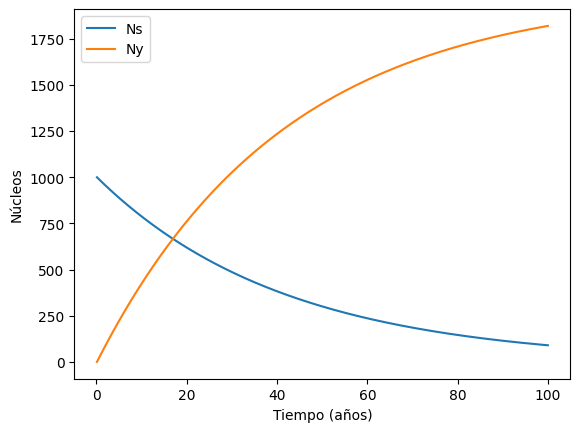

In [3]:

def desintegracion(t, Y, args):
    Ns, Ny = Y
    Ts, Ty= args
    ln2 = np.log(2)
    landa_s = ln2 / Ts
    landa_y = ln2 / Ty
    dNs = -landa_s * Ns
    dNy = landa_s * Ns - dNs
    return np.array([dNs, dNy])

Ts = 28.78        # años
Ty = 2.67 / 365   # años
args = [Ts, Ty]
t0 = 0.1
tf = 100
h = 0.01
Y0 = [1000, 0]    # condición inicial

f = lambda t, Y: desintegracion(t, Y, args)
t, sol = Euler(f, t0, tf, Y0, h)

plt.plot(t, sol[0], label='Ns')
plt.plot(t, sol[1], label='Ny')
plt.xlabel('Tiempo (años)')
plt.ylabel('Núcleos')
plt.legend()
plt.show()




# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

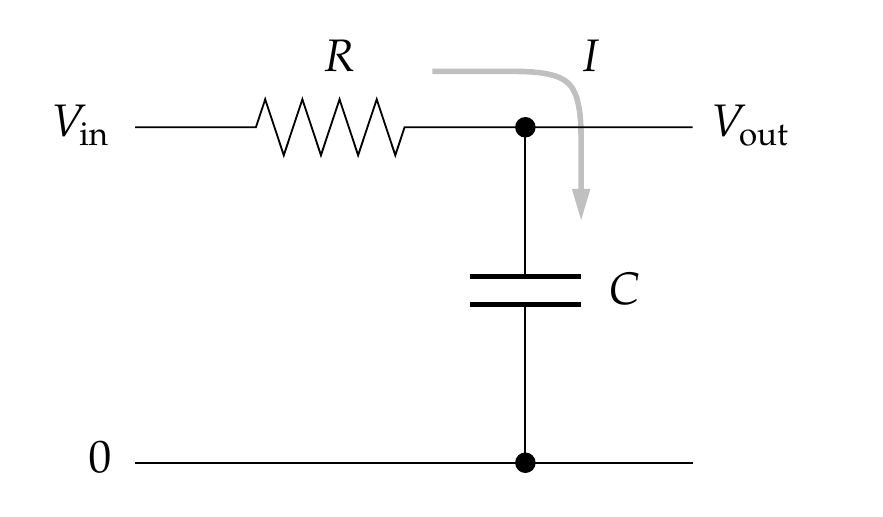

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

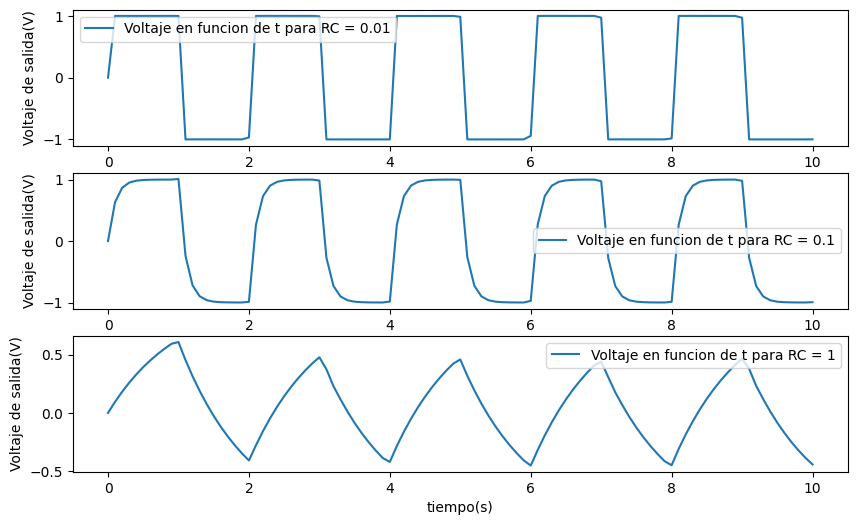

In [4]:
def Vout(t, Y, args):
    if int(t) % 2 ==0:
        Vin = 1
    else: Vin = -1
    Vout = Y
    RC = args
    dVout = 1 / (RC) * (Vin - Vout)

    return [dVout]
    
t0 = 0
tf = 10
h = 0.1
t = np.arange(t0, tf+h, h)
RCs = [1e-2, 1e-1, 1]
Vout0 =0
n = len(RCs)
plt.figure(figsize = (10,6))
for i in range(n):
    f = lambda t, Y : Vout(t, Y, RCs[i])
    sol = solve_ivp(f, (t0, tf), [Vout0], method='RK45', t_eval=t)

    plt.subplot(n, 1, i+1)
    plt.plot(sol.t, sol.y[0], label = f'Voltaje en funcion de t para RC = {RCs[i]}')
    plt.ylabel('Voltaje de salida(V)')
    plt.xlabel('tiempo(s)')
    plt.legend()
    




# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

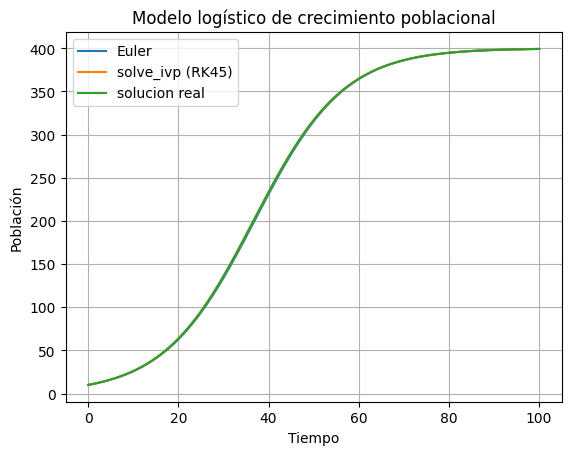

Error absoluto máximo para Euler: 2.3251457113424294
Error absoluto máximo para RK45: 0.2152132613342701


In [5]:
def my_logistic_eq(t, P, r, K):
    '''
    Esta función representa la ecuación logística (modelo dP/dt):
    dP/dt = r * P * (1 - P/K)

    Parámetros:
    t : tiempo (float)
    P : población actual (float)
    r : tasa de crecimiento (float)
    K : capacidad de carga (float)

    Retorna:
    dP/dt : tasa de cambio de la población
    '''
    return r * P * (1 - (P / K))


def logistic_solution(t, P0, r, K):
    """
    Solución analítica de la ecuación logística:
    P(t) = (K * P0 * e^(rt)) / (K + P0 * (e^(rt) - 1))

    Parámetros:
    - t: tiempo (float o array)
    - P0: población inicial
    - r: tasa de crecimiento
    - K: capacidad de carga

    Retorna:
    - P(t): población en el tiempo t
    """
    exp_rt = np.exp(r * t)
    return (K * P0 * exp_rt) / (K + P0 * (exp_rt - 1))

# Parámetros del modelo
Po = 10
t0 = 0
tf = 100
h = 0.2
r = 0.1
K = 400

t_evals = np.arange(t0, tf+h, h)

# Solución con Euler
te, Pe = Euler(lambda t, P: my_logistic_eq(t, P, r, K), t0,tf, [Po], h)

# Solución con solve_ivp
sol = solve_ivp(lambda t, P: my_logistic_eq(t, P, r, K), (t0, tf), [Po], method='RK45', t_eval=t_evals)

#solucion real
sol_real = logistic_solution(t_evals,Po, r,K )

# Graficar
plt.plot(te, Pe[0], label='Euler')
plt.plot(sol.t, sol.y[0], label='solve_ivp (RK45)')
plt.plot(t_evals, sol_real ,label = 'solucion real' )
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Modelo logístico de crecimiento poblacional')
plt.legend()
plt.grid(True)
plt.show()

# Interpolate Euler solution to match t_evals for error calculation
#Pe_interp = np.interp(t_evals, te, Pe)

error_euler = max(abs(Pe[0] - sol_real))
error_RK45 = max(abs(sol.y[0]- sol_real))

print(f"Error absoluto máximo para Euler: {error_euler}")
print(f"Error absoluto máximo para RK45: {error_RK45}")

# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=\sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:22: SyntaxWarning: invalid escape sequence '\p'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9252\786285403.py:22: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(sol_2.t, sol_2.y[0], label='Ángulo θ(t) para u0 = $\pi/2$')


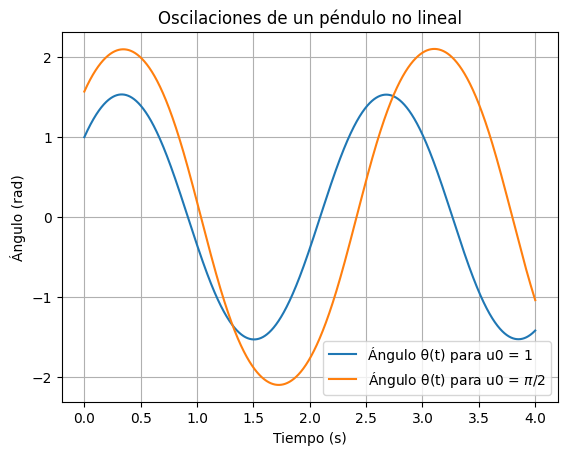

In [6]:


def desplazamiento_angular(t, Y):
    u = Y[0]        # ángulo
    du = Y[1]       # velocidad angular
    dd_u = -9.8 * np.sin(u)  # aceleración angular (no lineal)
    return [du, dd_u]

#Valor del h
h= 0.001
# Tiempo de evaluación
t_evals = np.arange(0,4+h, h)

#condiciones iniciales de u
u01 = 1
u02 = np.pi/2
# Condiciones iniciales: ángulo inicial = 1, velocidad angular = 0
sol_1 = solve_ivp(desplazamiento_angular, (0, 100), [u01, np.pi], method='RK45', t_eval=t_evals)
#Condiciones iniciales: angulo inicial = pi/2, velocidad angular = 0
sol_2 = solve_ivp(desplazamiento_angular, (0, 100), [u02, np.pi], method='RK45', t_eval=t_evals)

# Graficar ángulo en función del tiempo
plt.plot(sol_1.t, sol_1.y[0], label='Ángulo θ(t) para u0 = 1')
plt.plot(sol_2.t, sol_2.y[0], label='Ángulo θ(t) para u0 = $\pi/2$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Oscilaciones de un péndulo no lineal')
plt.grid(True)
plt.legend()
plt.show()


In [7]:
#Definimos la funcion que representa T/T0
u0 = np.linspace(-np.pi, np.pi, 100)


def T_T0_or (u0):
  T_T0 = np.zeros_like(u0)

  for i in range(len(u0)):

    alpha = np.sin(u0[i]/2)

    dK = lambda z : 1/np.sqrt((1-z**2)*(1 - alpha*z**2))
    K, error = quad(dK, 0 ,1)
    T_T0[i] = 2/np.pi * K
  return T_T0


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9252\2325523030.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  dK = lambda z : 1/np.sqrt((1-z**2)*(1 - alpha*z**2))
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9252\2325523030.py:13: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  K, error = quad(dK, 0 ,1)


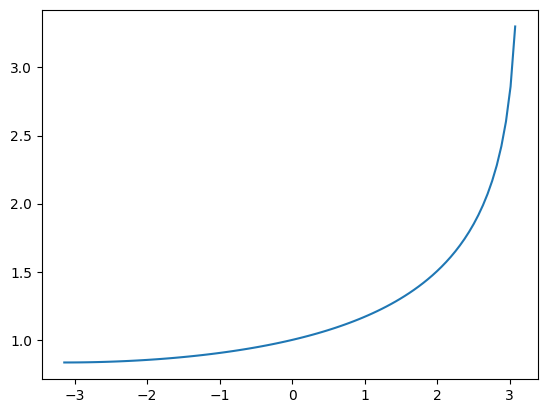

In [8]:
u0 = np.linspace(-np.pi, np.pi, 100)
plt.plot(u0, T_T0_or(u0))

# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

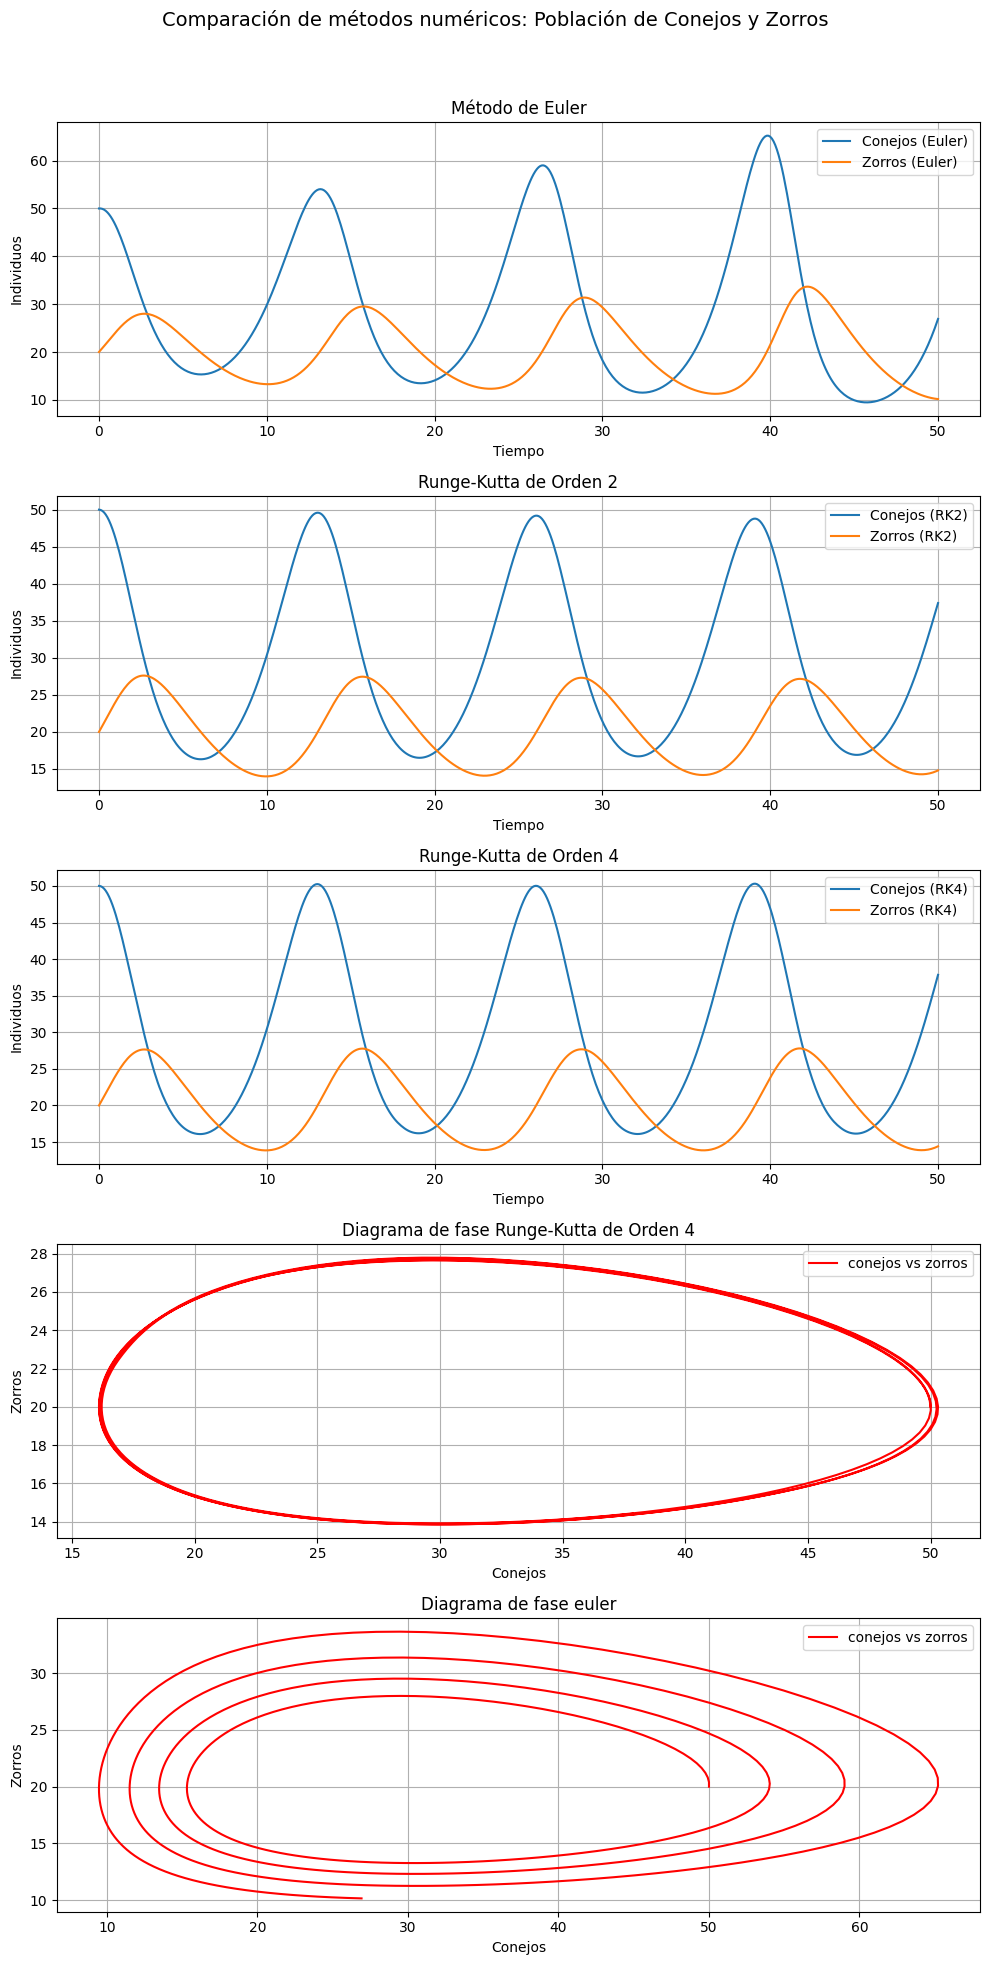

In [9]:
#Definimos la funcion que representa el comportamiemto de ambas poblaciones

def poblacion(t, Y, args):
  x, y = Y
  alpha, betha, gamma, landa = args
  dY = np.zeros_like(Y)
  dY[0]= alpha* x - betha * x* y
  dY[1] = - gamma* y + landa* x* y

  return dY

h = 0.1
t0 = 0
tf = 50

evals = np.arange(t0, tf + h, h)

args= [0.8, 0.04, 0.3, 0.01]
x0 = 50
y0 = 20
Y0 = np.array([x0, y0], dtype = float)
f = lambda t, Y : poblacion(t, Y, args)
te, sol_e = Euler(f, t0, tf, Y0, h)
solR2 = solve_ivp(f, (t0, tf),Y0, method ='RK23',t_eval=evals)
solR4 =solve_ivp(f, (t0, tf),Y0, method ='RK45',t_eval=evals)



plt.figure(figsize=(10, 20))
plt.suptitle('Comparación de métodos numéricos: Población de Conejos y Zorros', fontsize=14)


plt.subplot(5, 1, 1)
plt.plot(te, sol_e[0], label='Conejos (Euler)', color='tab:blue')
plt.plot(te, sol_e[1], label='Zorros (Euler)', color='tab:orange')
plt.title('Método de Euler')
plt.xlabel('Tiempo')
plt.ylabel('Individuos')
plt.legend()
plt.grid(True)

plt.subplot(5, 1, 2)
plt.plot(solR2.t, solR2.y[0], label='Conejos (RK2)', color='tab:blue')
plt.plot(solR2.t, solR2.y[1], label='Zorros (RK2)', color='tab:orange')
plt.title('Runge-Kutta de Orden 2')
plt.xlabel('Tiempo')
plt.ylabel('Individuos')
plt.legend()
plt.grid(True)

plt.subplot(5, 1, 3)
plt.plot(solR4.t, solR4.y[0], label='Conejos (RK4)', color='tab:blue')
plt.plot(solR4.t, solR4.y[1], label='Zorros (RK4)', color='tab:orange')
plt.title('Runge-Kutta de Orden 4')
plt.xlabel('Tiempo')
plt.ylabel('Individuos')
plt.legend()
plt.grid(True)


plt.subplot(5, 1, 4)
plt.plot(solR4.y[0], solR4.y[1], label='conejos vs zorros', color='red')
plt.title('Diagrama de fase Runge-Kutta de Orden 4')
plt.xlabel('Conejos')
plt.ylabel('Zorros')
plt.legend()
plt.grid(True)


plt.subplot(5, 1, 5)
plt.plot(sol_e[0], sol_e[1], label='conejos vs zorros', color='red')
plt.title('Diagrama de fase euler')
plt.xlabel('Conejos')
plt.ylabel('Zorros')
plt.legend()
plt.grid(True)


plt.tight_layout(rect=[0, 0, 1, 0.96])  # deja espacio para el título general
plt.show()


# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


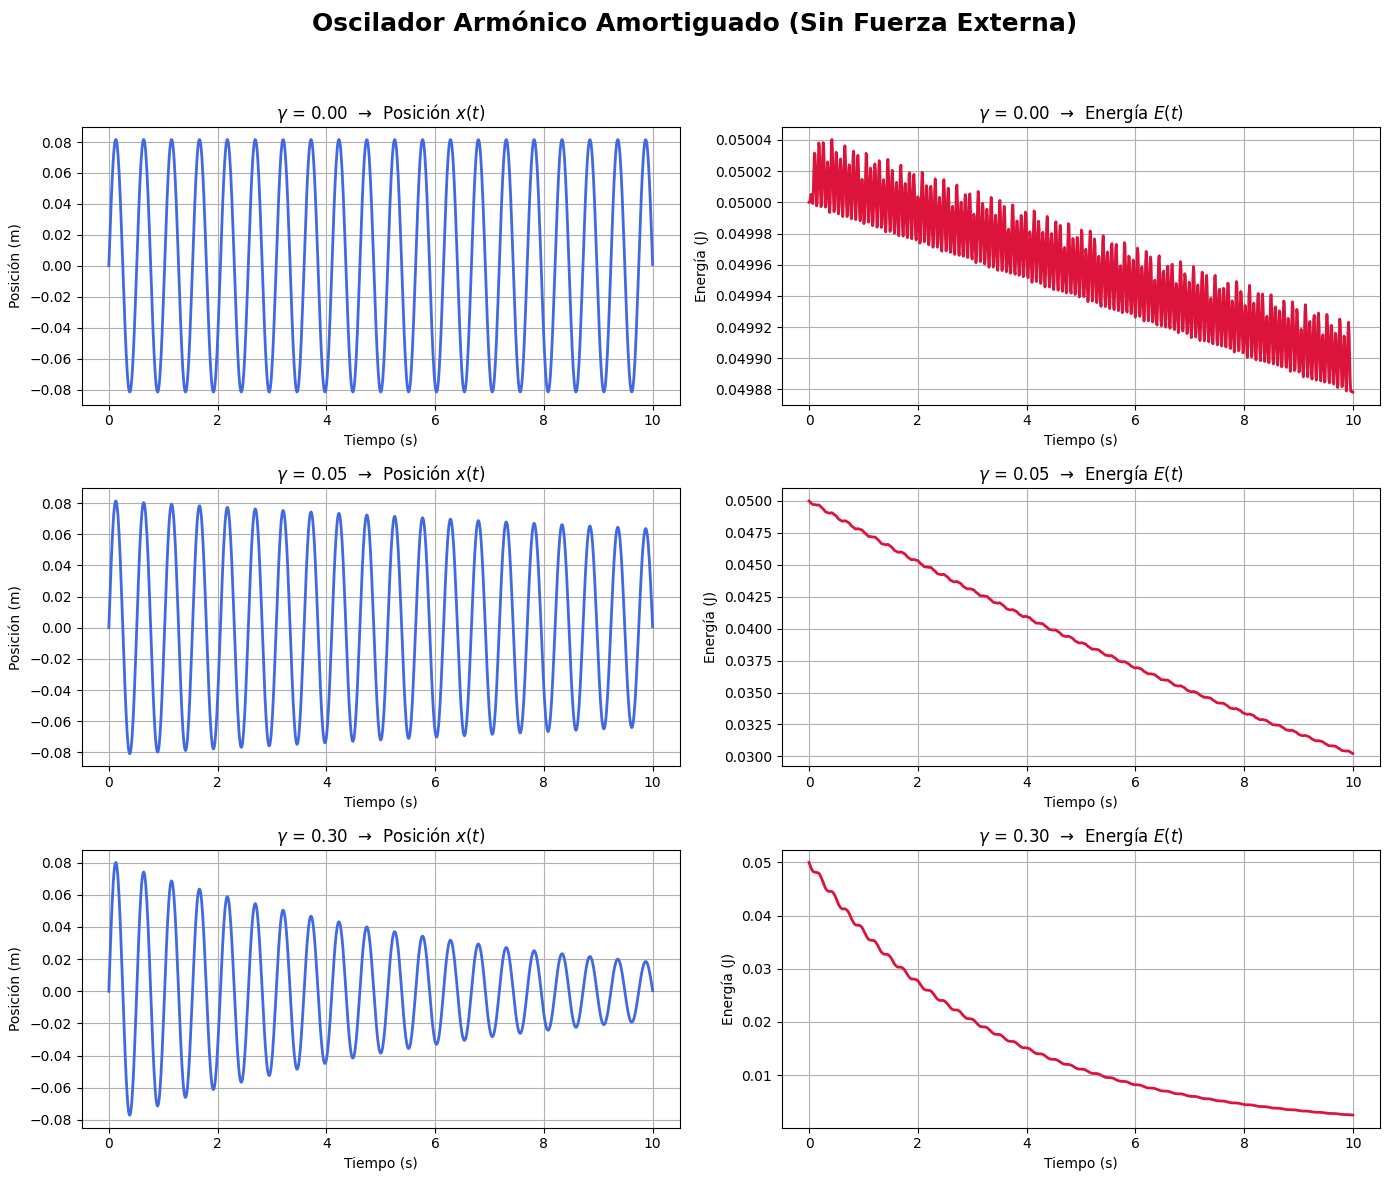

In [10]:
#Funcion que se relaciona con el sistema
def Oscilador_armonico_forzado_amortiguado(t, X, args):
  gamma, omega_0, F, m = args
  x, v = X
  dX = np.zeros_like(X)
  dX[0] = v
  dX[1]=  F/m - gamma * v - omega_0 ** 2 * x

  return dX

#Condiciones iniciales
x0 = 0
v0 = 1
t0 = 0
tf = 10
h = 0.01

X0 = np.array([x0, v0])
t = np.arange(t0, tf + h, h)



gammas = np.array([0, 0.05, 0.3], dtype = float)
n = len(gammas)
F = 0.0 #N
m = 0.1 #kg
k = 15.0 #Nm
omega_0 = np.sqrt(k/m)


plt.figure(figsize=(14, 12))
plt.suptitle('Oscilador Armónico Amortiguado (Sin Fuerza Externa)', fontsize=18, fontweight='bold')

for i in range(n):
    #Extraemos los valores de gamma
    gamma = gammas[i]
    args = [gamma, omega_0, F, m]
    #Definimos la funcion que vamos a usar realmente y calculamos la solucion
    f = lambda t, X: Oscilador_armonico_forzado_amortiguado(t, X, args)
    sol = solve_ivp(f, (t0, tf), X0, method='RK45', t_eval=t)

    #Extraemos los valores de la solucion
    x = sol.y[0]
    v = sol.y[1]
    E = 0.5 * m * v**2 + 0.5 * k * x**2

    #Posición
    plt.subplot(n, 2, 2*i + 1)
    plt.plot(sol.t, x, color='royalblue', linewidth=2)
    plt.title(rf'$\gamma$ = {gamma:.2f}  →  Posición $x(t)$', fontsize=12)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Posición (m)')
    plt.grid(True)

    #Energia
    plt.subplot(n, 2, 2*i + 2)
    plt.plot(sol.t, E, color='crimson', linewidth=2)
    plt.title(rf'$\gamma$ = {gamma:.2f}  →  Energía $E(t)$', fontsize=12)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Energía (J)')
    plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para el título general
plt.show()




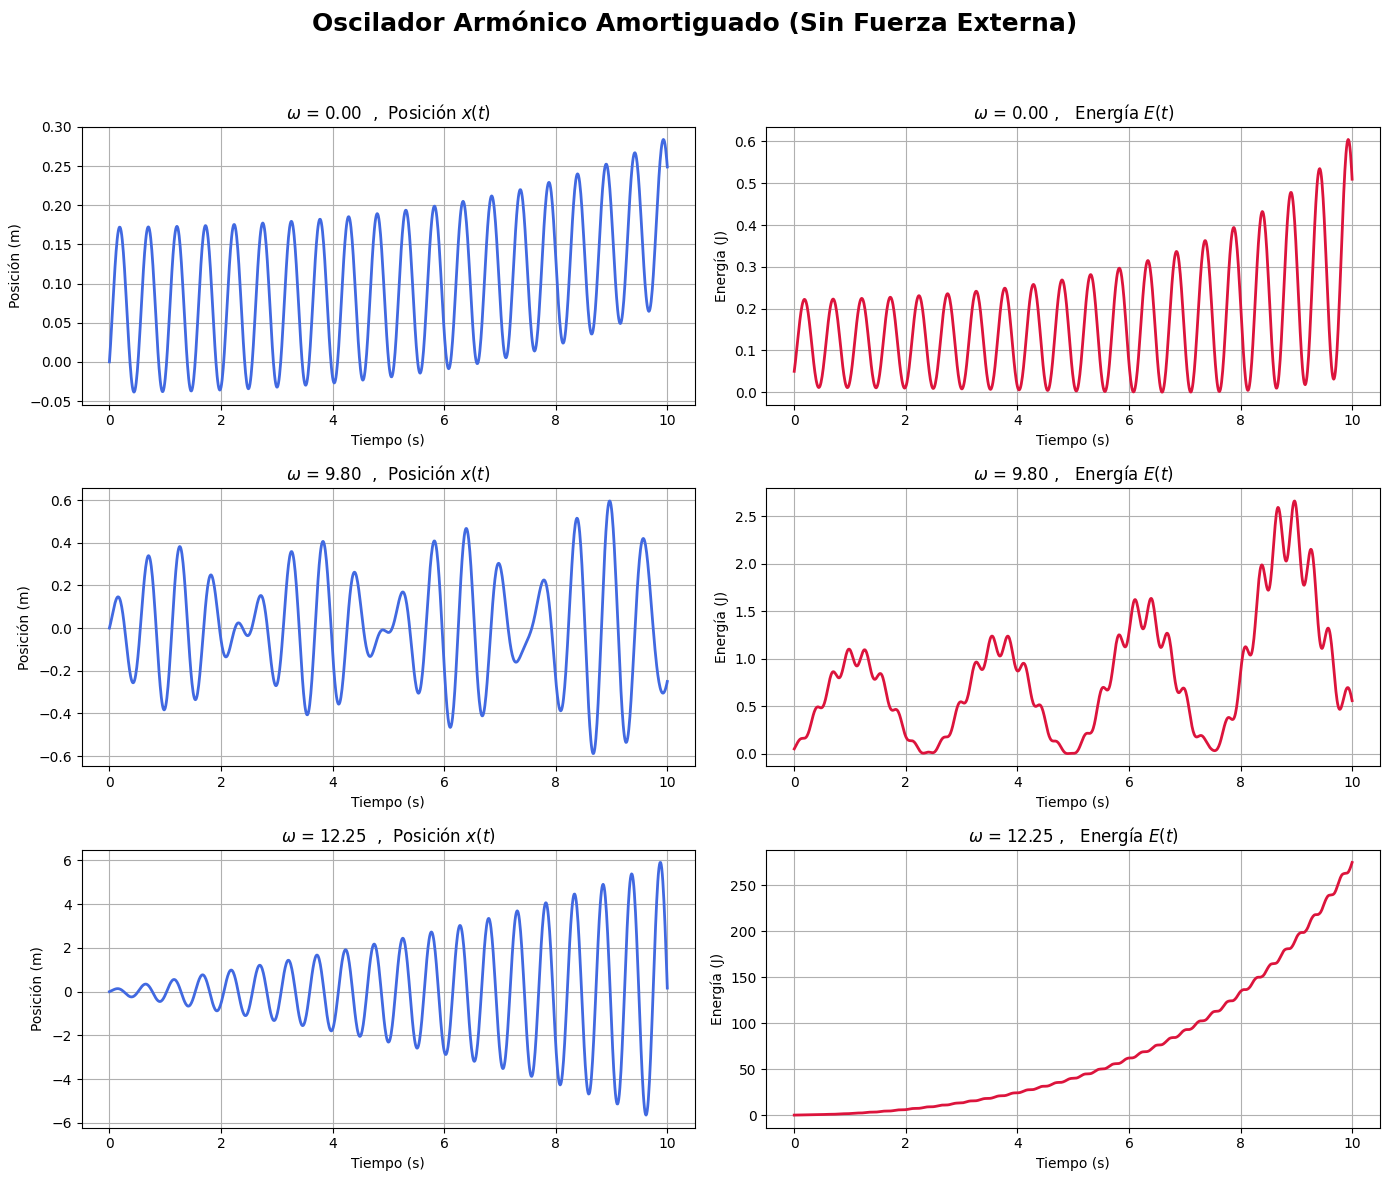

In [11]:

#Definimos la funcion que se relaciona con el sistema

def Oscilador_armonico_forzado_amortiguado(t, X, args):
  gamma, omega_0, omega, F0, m, T = args
  F = lambda t: F0 * np.cos(omega * t) * np.e **((-t / T)**2)

  x, v = X
  dX = np.zeros_like(X)
  dX[0] = v
  dX[1]=  F(t)/m - gamma * v - omega_0 ** 2 * x

  return dX

#Condiciones iniciales
x0 = 0
v0 = 1
t0 = 0
tf = 10
h = 0.01

X0 = np.array([x0, v0])
t = np.arange(t0, tf + h, h)

F0 = 1.0 #N
m = 0.1 #kg
k = 15.0 #Nm
omega_0 = np.sqrt(k/m)
gamma = 0
T = 10.0 #s
omegas = np.array([0, 0.8* omega_0, omega_0], dtype = float)
n = len(omegas)


plt.figure(figsize=(14, 12))
plt.suptitle('Oscilador Armónico Amortiguado (Sin Fuerza Externa)', fontsize=18, fontweight='bold')

for i in range(n):
    #Extraemos cada valor de omega
    omega = omegas[i]
    #definimos los argumentos
    args = [gamma, omega_0, omega, F0, m, T]
    # definimos la funcion que vamos a utilizar usando los argumentos
    f = lambda t, X: Oscilador_armonico_forzado_amortiguado(t, X, args)
    #Resolvelos la ecucacion diferencial usando solve ivp
    sol = solve_ivp(f, (t0, tf), X0, method='RK45', t_eval=t)

    #Extraemos los valores de la solucion y calculamos la energia
    x = sol.y[0]
    v = sol.y[1]
    E = 0.5 * m * v**2 + 0.5 * k * x**2

    #Imprimimos posicion
    plt.subplot(n, 2, 2*i + 1)
    plt.plot(sol.t, x, color='royalblue', linewidth=2)
    plt.title(rf'$\omega$ = {omega:.2f}  ,  Posición $x(t)$', fontsize=12)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Posición (m)')
    plt.grid(True)

    #Imprimimos energia
    plt.subplot(n, 2, 2*i + 2)
    plt.plot(sol.t, E, color='crimson', linewidth=2)
    plt.title(rf'$\omega$ = {omega:.2f} ,   Energía $E(t)$', fontsize=12)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Energía (J)')
    plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para el título general
plt.show()


# 7.
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa. 

Definimos el parámetro de masa $\mu$ como:
$$
\mu \equiv \frac{m_2}{m_1 + m_2}, \quad \text{con} \quad 0 < \mu \leq \frac{1}{2}
$$

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el **potencial efectivo** $U$ puede escribirse como:
$$
U = -\frac{\mu}{r_1} - \frac{1-\mu}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2)
$$
donde $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$ respectivamente:
$$
r_1 = \sqrt{(x + \mu)^2 + y^2}, \quad r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}
$$

Las ecuaciones de movimiento de la partícula testigo son:
$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y $\omega^2 = 1$, existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas se equilibran.

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$. Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh** 
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter.

In [58]:
import sympy as sp

# Definimos símbolos
x, y, mu, omega = sp.symbols('x y mu omega', real=True)

# Distancias al cuerpo 1 y 2 (en coordenadas rotantes)
r1 = sp.sqrt((x + mu)**2 + y**2)
r2 = sp.sqrt((x - 1 + mu)**2 + y**2)

# Potencial efectivo U 
U = (1 - mu)/r1 + mu/r2 + sp.Rational(1,2)*omega**2*(x**2 + y**2)

# Coordenadas de L4
xL = sp.Rational(1,2) - mu
yL = sp.sqrt(3)/2

# Derivadas de segundo orden
U_xx = sp.diff(U, x, 2).subs({x: xL, y: yL})
U_xy = sp.diff(U, x, y).subs({x: xL, y: yL})
U_yx = sp.diff(U, y, x).subs({x: xL, y: yL})
U_yy = sp.diff(U, y, 2).subs({x: xL, y: yL})

# Simplificar expresiones
a = sp.simplify(U_xx)
b = sp.simplify(U_xy)
c = sp.simplify(U_yx)
d = sp.simplify(U_yy)

# Mostrar resultados simbólicos
print("a =", a)
print("b =", b)
print("c =", c)
print("d =", d)

# Lambdificar
a_fun = sp.lambdify((mu, omega), a, "numpy")
b_fun = sp.lambdify((mu, omega), b, "numpy")
c_fun = sp.lambdify((mu, omega), c, "numpy")
d_fun = sp.lambdify((mu, omega), d, "numpy")

# Función que arma la matriz A
def matriz_A(mu_val, omega_val):
    a = a_fun(mu_val, omega_val)
    b = b_fun(mu_val, omega_val)
    c = c_fun(mu_val, omega_val)
    d = d_fun(mu_val, omega_val)
    A = np.array([
        [0.0,       1.0,    0.0,        0.0],
        [a,         0.0,    b,          2.0*omega_val],
        [0.0,       0.0,    0.0,        1.0],
        [c,   -2.0*omega_val, 0.0,      d]
    ])
    return A

# Parámetros
omega = 1
mu_vals = np.logspace(-19, -3, 19)   # 50 valores entre 1e-6 y 1e-1
valores = []

# Calcular autovalores para cada mu
for mu_val in mu_vals:
    eigs = np.linalg.eigvals(matriz_A(mu_val, omega))
    valores.append(eigs)

valores = np.array(valores)

import sympy as sp
import numpy as np

# Definimos símbolos
x, y, mu, omega = sp.symbols('x y mu omega', real=True)

# Distancias al cuerpo 1 y 2 (en coordenadas rotantes)
r1 = sp.sqrt((x + mu)**2 + y**2)
r2 = sp.sqrt((x - 1 + mu)**2 + y**2)

# Potencial efectivo U 
U = (1 - mu)/r1 + mu/r2 + sp.Rational(1,2)*omega**2*(x**2 + y**2)

# Coordenadas de L4
xL = sp.Rational(1,2) - mu
yL = sp.sqrt(3)/2

# Derivadas de segundo orden
U_xx = sp.diff(U, x, 2).subs({x: xL, y: yL})
U_xy = sp.diff(U, x, y).subs({x: xL, y: yL})
U_yx = sp.diff(U, y, x).subs({x: xL, y: yL})
U_yy = sp.diff(U, y, 2).subs({x: xL, y: yL})

# Simplificar expresiones
a = sp.simplify(U_xx)
b = sp.simplify(U_xy)
c = sp.simplify(U_yx)
d = sp.simplify(U_yy)

# Mostrar resultados simbólicos
print("a =", a)
print("b =", b)
print("c =", c)
print("d =", d)

# Lambdificar
a_fun = sp.lambdify((mu, omega), a, "numpy")
b_fun = sp.lambdify((mu, omega), b, "numpy")
c_fun = sp.lambdify((mu, omega), c, "numpy")
d_fun = sp.lambdify((mu, omega), d, "numpy")

# Función que arma la matriz A
def matriz_A(mu_val, omega_val):
    a = a_fun(mu_val, omega_val)
    b = b_fun(mu_val, omega_val)
    c = c_fun(mu_val, omega_val)
    d = d_fun(mu_val, omega_val)
    A = np.array([
        [0.0,       1.0,    0.0,        0.0],
        [a,         0.0,    b,          2.0*omega_val],
        [0.0,       0.0,    0.0,        1.0],
        [c,   -2.0*omega_val, 0.0,      d]
    ])
    return A

# Parámetros
omega = 1
mu_vals = np.logspace(-6, -1, 50)   # 50 valores entre 1e-6 y 1e-1
valores = []

# Calcular autovalores para cada mu
for mu_val in mu_vals:
    eigs = np.linalg.eigvals(matriz_A(mu_val, omega))
    valores.append(eigs)

valores = np.array(valores)

for i in range(len(valores)):
    print(f"mu = {mu_vals[i]:.2e} -> autovalores = {valores[i]}")




a = omega**2 - 1/4
b = 3*sqrt(3)*(1 - 2*mu)/4
c = 3*sqrt(3)*(1 - 2*mu)/4
d = omega**2 + 5/4
a = omega**2 - 1/4
b = 3*sqrt(3)*(1 - 2*mu)/4
c = 3*sqrt(3)*(1 - 2*mu)/4
d = omega**2 + 5/4
mu = 1.00e-06 -> autovalores = [ 1.20914581+1.61536827j  1.20914581-1.61536827j -0.73341505+0.j
  0.56512343+0.j        ]
mu = 1.26e-06 -> autovalores = [ 1.20914593+1.61536823j  1.20914593-1.61536823j -0.73341483+0.j
  0.56512297+0.j        ]
mu = 1.60e-06 -> autovalores = [ 1.20914608+1.61536818j  1.20914608-1.61536818j -0.73341456+0.j
  0.5651224 +0.j        ]
mu = 2.02e-06 -> autovalores = [ 1.20914627+1.61536812j  1.20914627-1.61536812j -0.73341421+0.j
  0.56512167+0.j        ]
mu = 2.56e-06 -> autovalores = [ 1.20914651+1.61536804j  1.20914651-1.61536804j -0.73341378+0.j
  0.56512075+0.j        ]
mu = 3.24e-06 -> autovalores = [ 1.20914682+1.61536794j  1.20914682-1.61536794j -0.73341322+0.j
  0.56511958+0.j        ]
mu = 4.09e-06 -> autovalores = [ 1.20914721+1.61536781j  1.20914721-1.61536781j -0.7

In [60]:
# Estabilidad para el sol, tierra y sol, jupiter

mt = 5.972e24
ms = 1.9885e30
mj = 1.898e27

#sol tierra
mu_val = mt/ (mt + ms)
eigs = np.linalg.eigvals(matriz_A(mu_val, omega))
print(f' valores prpios para sol- tierra {eigs}')
    

#sol jupyter
mu_val = mj/ (mj + ms)
eigs = np.linalg.eigvals(matriz_A(mu_val, omega))
print(f' valores prpios para sol- jupyter {eigs}')




 valores prpios para sol- tierra [ 1.20914672+1.61536798j  1.20914672-1.61536798j -0.73341341+0.j
  0.56511998+0.j        ]
 valores prpios para sol- jupyter [ 1.20957624+1.6152286j  1.20957624-1.6152286j -0.7326392 +0.j
  0.56348672+0.j       ]


# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
$$
\Sigma(t)=\Sigma(0)\cos{\kappa t}+\frac{\dot{\Sigma(0)}}{\kappa}\sin{\kappa t}
$$
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


In [ ]:
#Definimos la funcion que( representa el sistema

def Dinamica_galactica(t, SIGMA, args):
  sigma, v = SIGMA

  V0 , r = args
  OMEGA = V0/r

  k = (2)**0.5 * OMEGA

  dSIGMA = np.zeros_like(SIGMA)
  dSIGMA[0] = v
  dSIGMA[1] = -k**2  * sigma

  return dSIGMA

#Condiciones iniciales
t0 = 0
tf = 4e9
v0 = 2.2e5
sigma0 = 0

SIGMA0 = [sigma0, v0]

#Valores nesesarios
r = 24e20
h = 1e7
t = np.arange(t0, tf+h, h)
args = [v0,r ]
f = lambda t, SIGMA : Dinamica_galactica(t, SIGMA, args)
#Encontramos la solucion de la ecuacion diferencial

sol = solve_ivp(f,(t0, tf), SIGMA0, method='RK45', t_eval=t)

plt.figure(figsize =(10,8))
plt.title('Evolución de perturbaciones en la densidad superficial', fontweight = 'bold', fontsize = 16)
plt.plot(sol.t/31.536e6, sol.y[0]/1e13, 'm--',label = 'Densidad superficial en funcion del tiempo')
plt.xlabel('Tiempo(años)')
plt.ylabel(r'$\Sigma \times 10^{13}\; \left[\frac{\mathrm{kg}}{\mathrm{m}^2}\right]$')
plt.legend()
plt.show()

In [ ]:
#Matriz que representa el sistema
#dY/dt = A * Y sinendo Y =[sigma, v]

A = np.array([[0, 1],
              [-k, 0]])

#Calculo de los valores propios

In [ ]:
def Sigma(t, Sigma0, dSigma0, k):
    """
    Parámetros:
    t : float o array
        Tiempo
    Sigma0 : float
        Valor inicial Σ(0)
    dSigma0 : float
        Derivada inicial Σ'(0)
    k : float
        Constante κ

    Retorna:
    float o array : valor de Sigma(t)
    """
    return Sigma0 * np.cos(k * t) + (dSigma0 / k) * np.sin(k * t)

# Parámetros
t0 = 0
tf = 4e9
v0 = 2.2e5
Sigma0 = 0
r = 24e20
h = 1e7

t = np.arange(t0, tf + h, h)
k = np.sqrt(2) * v0 / r

# Gráfica
plt.figure(figsize = (10,8))
plt.title('Solucion analitica', fontweight = 'bold', fontsize = 16)
plt.plot(t/31.536e6, Sigma(t, Sigma0, v0, k)/1e13, 'r--')
plt.xlabel("t(años)")
plt.ylabel(r"$\Sigma$(t)")
plt.show()


# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.

**Nota:** La siguiente relación puede ser útil
$$
v_{n+1/2}=v_{n}+\frac{1}{2}f(x_{n})\Delta t
$$


In [ ]:
def Metodo_de_Leapfrog(f, t0, tf, X0, h):
    '''
    Esta funcion resuelve ecuaciones diferenciales ordinarias usando 
    el metodo de Leapfrog 

    Entradas:

    f: funcion callable
    t0: tiempo inicial
    tf: tiempo final
    h : paso del  intervalo de tiempo
    X0 : condiciones iniciales (array)
    
    Salidas
    X : array con la solucion del sistema
    '''

    n = int((tf- t0)/h)
    t = np.zeros(n+1)
    x = np.zeros(n+1)
    v = np.zeros(n+1)
    
    x0, v0 = X0

    t[0] = t0
    x[0] = x0
    v[0] = v0
    
    for i in range(n):
        
        t[i + 1] = t[i] + h #guardamos el valor de t correspondiente al paso
        v1_2 = v[i] + 1/2 * f(x[i]) * h #Calculamos el salto de la rana para n+1/2
        
        x[i+1] = x[i] + v1_2* h # Calculamos la posicion
        
        v[i+1] = v1_2 + 0.5 * f(x[i+1])*h # Calculamos la velocidad sumandole el salto 
        
    return [t, x, v]
        
    
    

In [ ]:
f = lambda x : -4 * x
t0 = 0
tf = 10
h = 1e-2
x0 = 1
v0 = 0
t, x, v = Metodo_de_Leapfrog(f, t0, tf, [x0,v0] ,h)


In [ ]:
plt.figure(figsize = (10,8))
plt.title(r'Oscilador armonico con ecuacion f(x) = $ -\omega^2 x$')
plt.plot(t, x, label = r'$x(t)$')
plt.plot(t,v, label = r'$v(t)$')
plt.xlabel('t(s)')
plt.legend()
plt.show()